## Mall Customer Segmentation Project

## 1. Introduction
In this project, we aim to segment customers based on their annual income and spending score. 
By identifying distinct customer groups, the mall can tailor marketing strategies and improve customer satisfaction.

In [4]:
# 2. Data Loading and Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

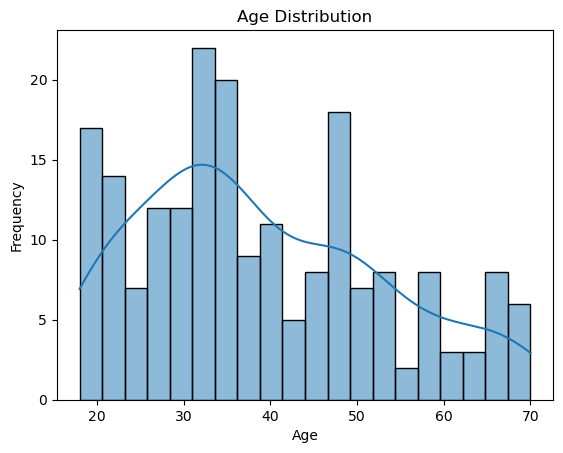

In [11]:
# Distribution of Age
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

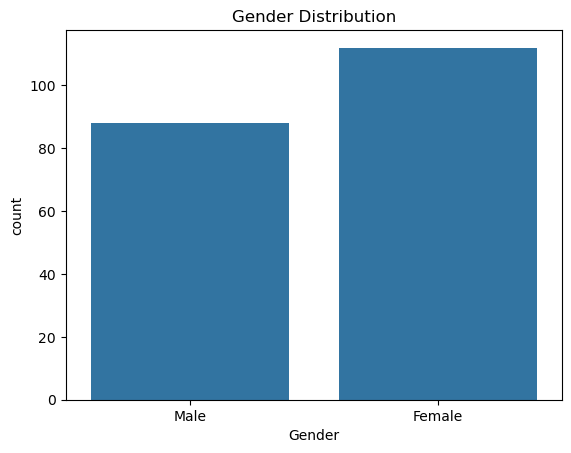

In [13]:
# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

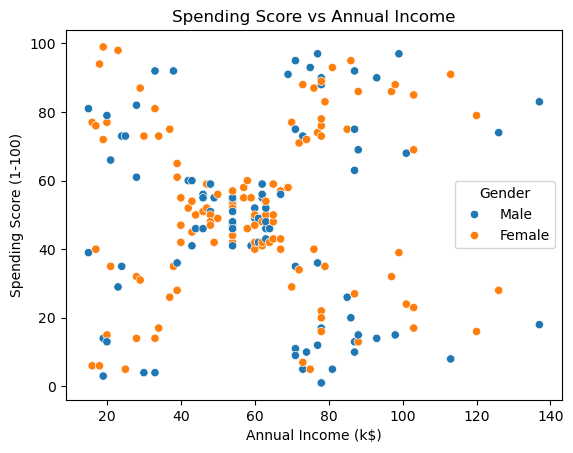

In [15]:
# Spending Score vs Annual Income
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 4. Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 5. Clustering with KMeans

C:\Users\erkri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\erkri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\erkri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\erkri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

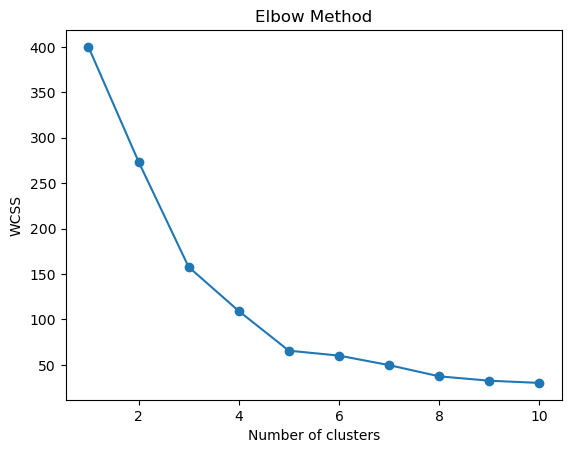

In [31]:
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# Applying KMeans with optimal clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df.head()

C:\Users\erkri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


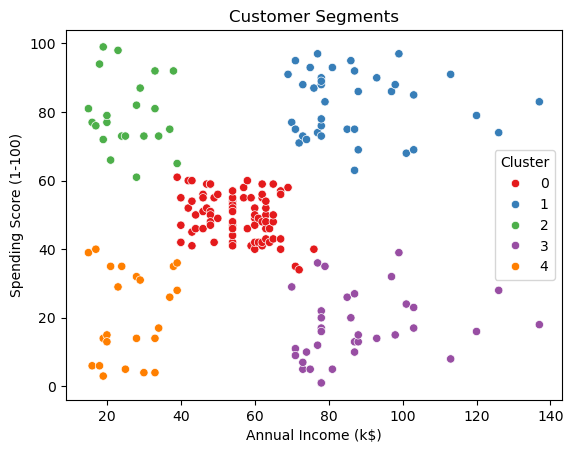

In [35]:
# Visualizing Clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df)
plt.title('Customer Segments')
plt.show()

## 6. Clustering with DBSCAN

In [38]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

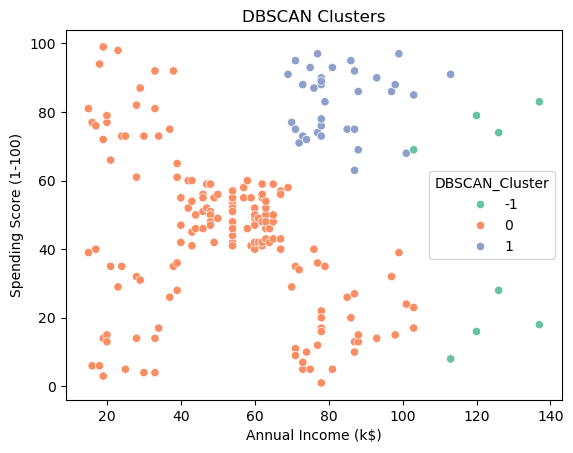

In [40]:
# Visualizing DBSCAN Clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Set2', data=df)
plt.title('DBSCAN Clusters')
plt.show()

## 7. Cluster Profiling

In [47]:
# KMeans Cluster profiling
# Select only numeric columns before grouping
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cluster_profile = df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


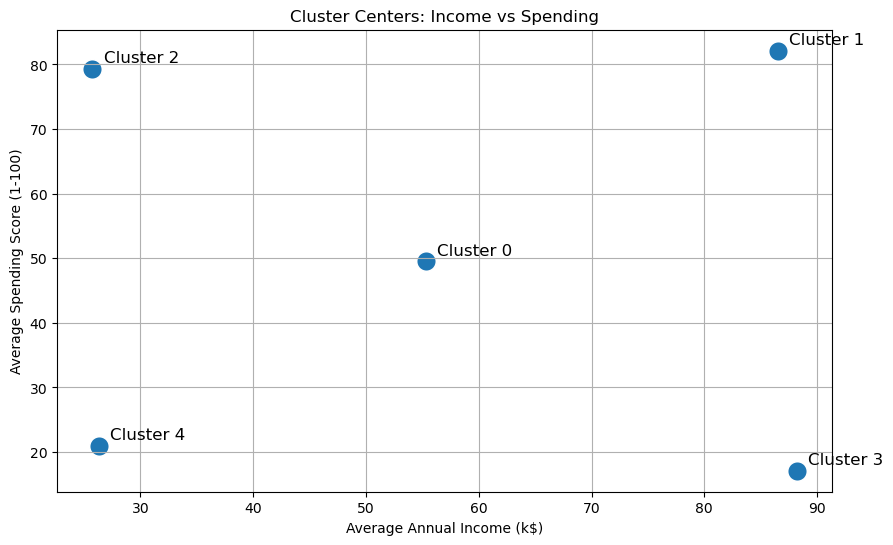

In [52]:
# Visualize Average Annual Income vs Average Spending Score for each cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_profile, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                s=200, 
                marker='o')

for i in cluster_profile.index:
    plt.text(cluster_profile.loc[i, 'Annual Income (k$)']+1, 
             cluster_profile.loc[i, 'Spending Score (1-100)']+1, 
             f'Cluster {i}', 
             fontsize=12)

plt.title('Cluster Centers: Income vs Spending')
plt.xlabel('Average Annual Income (k$)')
plt.ylabel('Average Spending Score (1-100)')
plt.grid()
plt.show()


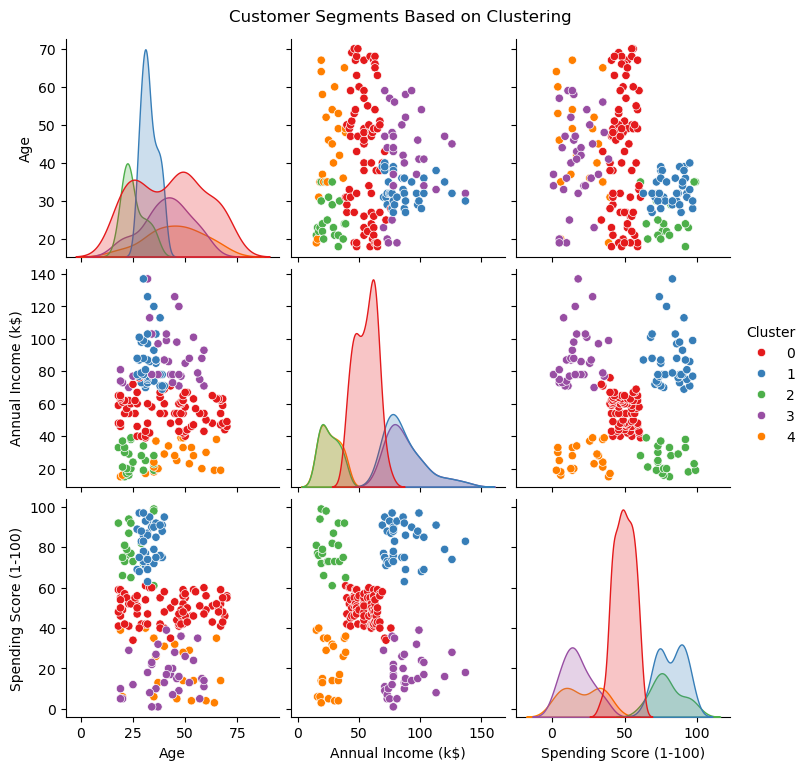

In [54]:
# Pairplot for Age, Annual Income, and Spending Score
sns.pairplot(df, 
             vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 
             hue='Cluster', 
             palette='Set1', 
             diag_kind='kde', 
             height=2.5)

plt.suptitle('Customer Segments Based on Clustering', y=1.02)
plt.show()


## 8. Conclusion and Business Recommendations
Through clustering, we identified distinct customer segments:
- High income, high spenders: Target for premium services.
- Low income, high spenders: Offer loyalty programs.
- High income, low spenders: Promote special deals.
- Low income, low spenders: Focus on volume promotions.

Business strategies can be tailored to these segments to maximize revenue and customer satisfaction.